In [1]:
import requests

url = 'https://www.mymcpl.org/cfapps/botb/year.cfm?id=2008'

response = requests.get(url)

response.status_code

200

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

page = response.text

soup = BeautifulSoup(page)

def make_soup(url):
    try:
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page)
        return soup
    except:
        return None

response.status_code
def make_book_list(soup):
    books = []
    authors = []
    movies = []
    b = soup.find_all('td', align = 'left')

    count = 1
    for i in b:
        if i.find('/')!=-1 and count%2 ==0:
            string = i.text.split('/')[0].strip().lower()
            if string[-3:]=='the':
                string = string[-3:]+' '+string[:-5]
                #print string 
            a_string = i.text.split('/')[-1].strip().lower()
            authors.append(a_string)
            books.append(string)
        if count%2 == 1:
            m_string = i.text.strip().lower()
            if m_string[-3:]=='the':
                m_string = m_string[-3:]+' '+m_string[:-5]
            movies.append(m_string)
        count +=1
    return books,authors,movies[:-1]

def books_to_movies(url):
    books = []
    authors = []
    movies = []
    count = 8
    while count < 16:
        c = str(count) 
        if len(c)==1:
            c = '0'+ c
        url = url[:-2]+c
        soup = make_soup(url)
        b,a,m=make_book_list(soup)
        books.append(b)
        authors.append(a)
        movies.append(m)
        count = count + 1
    return books, authors, movies

b,a,m = books_to_movies('https://www.mymcpl.org/cfapps/botb/year.cfm?id=2008')
b = [item for sublist in b for item in sublist]
a = [item for sublist in a for item in sublist]
m = [item for sublist in m for item in sublist]

/home/dkanarek/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [4]:
import datetime as dt

def times_book_list(soup):
    book_list = []
    rank_list = []
    l = soup.find_all('span',{ "class" : "bookName" })
    count = 1 
    for i in l:
        #if i.text[:3]=='THE':
        #    book_list.append(i.text[3:].strip().lower().replace(',',''))
        #else:
        book_list.append(i.text.lower().replace(',',''))
        rank_list.append(count)
        count += 1
    return book_list, rank_list 


In [5]:
def find_author(soup):
    author_list = []
    #l = s.find_all('td',{ "class":"summary" })
    #for i in l:
    #    print l.text
    #    author_list.append(i.text.split(' by ')[1].split('(')[0].strip()[:-1])
    return author_list

def update_dict(dictionary, author_list, book_list, rank_list, date):
    count = 0
    for y in book_list:
        if (y,author_list[count]) in dictionary:
            dictionary[(y,author_list[count])].append((date,rank_list[count]))
        else:
            dictionary[(y,author_list[count])] = (date,rank_list[count])
        count +=1
    return dictionary

In [6]:
u = 'http://www.nytimes.com/best-sellers-books/2011-02-18/combined-print-and-e-book-fiction/list.html'
u2 = 'http://www.nytimes.com/best-sellers-books/2012-12-16/young-adult/list.html'
u3 ='http://www.nytimes.com/best-sellers-books/2008-06-08/hardcover-fiction/list.html'

def bestseller_list(url,end_date):
    book_dict = {}
    start_date = url[42:52]
    end_date = dt.datetime.strptime(end_date,"%Y-%m-%d")
    d = dt.datetime.strptime(start_date,"%Y-%m-%d")
    time_delta = dt.timedelta(days=7)
    u = url
    while d < end_date:
        print u
        s = make_soup(u)
        bl, rl = times_book_list(s)
        #al =  find_author(s)
        i = 0
        while i < len(bl):
            if (bl[i]) in book_dict:
                book_dict[(bl[i])].append((d.strftime('%Y-%m-%d'),rl[i]))
            else:
                book_dict[(bl[i])]=[(d.strftime('%Y-%m-%d'),rl[i])]
            i += 1
        #book_dict = update_dict(book_dict, bl, find_author(s),rl, d.strftime('%Y-%m-%d'))
        #book_list.append(times_book_list(s))
        #book_list.append(zip(times_book_list(s),find_author(s)))
        d += time_delta
        u = url[:42]+d.strftime('%Y-%m-%d')+url[52:]
    return book_dict
   

In [94]:
bd = bestseller_list(u,'2015-12-31')

#for i in bd.keys():
#    print i, bd[i]

http://www.nytimes.com/best-sellers-books/2011-02-18/combined-print-and-e-book-fiction/list.html
http://www.nytimes.com/best-sellers-books/2011-02-25/combined-print-and-e-book-fiction/list.html
http://www.nytimes.com/best-sellers-books/2011-03-04/combined-print-and-e-book-fiction/list.html
http://www.nytimes.com/best-sellers-books/2011-03-11/combined-print-and-e-book-fiction/list.html
http://www.nytimes.com/best-sellers-books/2011-03-18/combined-print-and-e-book-fiction/list.html
http://www.nytimes.com/best-sellers-books/2011-03-25/combined-print-and-e-book-fiction/list.html
http://www.nytimes.com/best-sellers-books/2011-04-01/combined-print-and-e-book-fiction/list.html
http://www.nytimes.com/best-sellers-books/2011-04-08/combined-print-and-e-book-fiction/list.html
http://www.nytimes.com/best-sellers-books/2011-04-15/combined-print-and-e-book-fiction/list.html
http://www.nytimes.com/best-sellers-books/2011-04-22/combined-print-and-e-book-fiction/list.html
http://www.nytimes.com/best-se

In [95]:
ya = bestseller_list(u2,'2015-08-24')

http://www.nytimes.com/best-sellers-books/2012-12-16/young-adult/list.html
http://www.nytimes.com/best-sellers-books/2012-12-23/young-adult/list.html
http://www.nytimes.com/best-sellers-books/2012-12-30/young-adult/list.html
http://www.nytimes.com/best-sellers-books/2013-01-06/young-adult/list.html
http://www.nytimes.com/best-sellers-books/2013-01-13/young-adult/list.html
http://www.nytimes.com/best-sellers-books/2013-01-20/young-adult/list.html
http://www.nytimes.com/best-sellers-books/2013-01-27/young-adult/list.html
http://www.nytimes.com/best-sellers-books/2013-02-03/young-adult/list.html
http://www.nytimes.com/best-sellers-books/2013-02-10/young-adult/list.html
http://www.nytimes.com/best-sellers-books/2013-02-17/young-adult/list.html
http://www.nytimes.com/best-sellers-books/2013-02-24/young-adult/list.html
http://www.nytimes.com/best-sellers-books/2013-03-03/young-adult/list.html
http://www.nytimes.com/best-sellers-books/2013-03-10/young-adult/list.html
http://www.nytimes.com/be

In [23]:
hc = bestseller_list(u3,'2015-12-28')

http://www.nytimes.com/best-sellers-books/2008-06-08/hardcover-fiction/list.html
http://www.nytimes.com/best-sellers-books/2008-06-15/hardcover-fiction/list.html
http://www.nytimes.com/best-sellers-books/2008-06-22/hardcover-fiction/list.html
http://www.nytimes.com/best-sellers-books/2008-06-29/hardcover-fiction/list.html
http://www.nytimes.com/best-sellers-books/2008-07-06/hardcover-fiction/list.html
http://www.nytimes.com/best-sellers-books/2008-07-13/hardcover-fiction/list.html
http://www.nytimes.com/best-sellers-books/2008-07-20/hardcover-fiction/list.html
http://www.nytimes.com/best-sellers-books/2008-07-27/hardcover-fiction/list.html
http://www.nytimes.com/best-sellers-books/2008-08-03/hardcover-fiction/list.html
http://www.nytimes.com/best-sellers-books/2008-08-10/hardcover-fiction/list.html
http://www.nytimes.com/best-sellers-books/2008-08-17/hardcover-fiction/list.html
http://www.nytimes.com/best-sellers-books/2008-08-24/hardcover-fiction/list.html
http://www.nytimes.com/best-

In [8]:
import csv  
b = []
with open('bestsellers.txt','r') as f:
    reader = csv.reader(f)
    for row in reader:
        b.append(row)


In [92]:
bestseller_dict={}
for i in b:
    for j in i:
        if j in bestseller_dict:
            bestseller_dict[j]+=1
        else:
            bestseller_dict[j]=1


In [29]:
import re
import jellyfish as jf

def is_in(word):
    pattern =['the','or','a','of']
    for i in pattern:
        if word==i:
            return True
    return False

def title_words(title):
    words = title.split()
#    pattern =['the','or','a','of']
    p =[]
    for i in words:
        i = re.sub('[^0-9a-zA-Z]+', '', i).strip()
#        if is_in(i) == False:
        p.append(str(i))         
    return p

def title_words2(title):
    words = title.split()
#    pattern =['the','or','a','of']
    p =''
    for i in words:
        i = re.sub('[^0-9a-zA-Z]+', '', i).strip()
#        if is_in(i) == False:
        p+=str(i)         
    return p

def match_titles(string1, string2):
    s1 = title_words2(string1)
    s2 = title_words2(string2)
    count = 0
    if len(s1)!=len(s2):
        return False
    while count < len(s1):
        if s1[count]!=s2[count]:
            return False
        count += 1
    return True
   
def find_title_matches(book_movies,bestsellers):
    matches = []
    c = 0
    for i in book_movies:
         for l in bestsellers.keys():
                if match_titles(i,l):
                    try:
                        print str(l) + ' *** ' + str(i)
                        matches.append(str(i))
                        c+=1
                    except UnicodeEncodeError:
                        pass 

    print c
    return matches

matches = find_title_matches(list(b2m_df['Book']),bd)
matches2 = find_title_matches(list(b2m_df['Book']),ya)

kill shot  *** killshot
the help  *** the help
the lincoln lawyer  *** the lincoln lawyer
one day  *** one day
something borrowed  *** something borrowed
water for elephants  *** water for elephants
abraham lincoln: vampire hunter  *** abraham lincoln: vampire hunter
life of pi  *** life of pi
the lucky one  *** the lucky one
one for the money  *** one for the money
the silver linings playbook  *** the silver linings playbook
admission  *** admission
ender's game  *** ender's game
home front  *** homefront
labor day  *** labor day
safe haven  *** safe haven
addicted  *** addicted
flowers in the attic  *** flowers in the attic
gone girl  *** gone girl
this is where i leave you  *** this is where i leave you
winter's tale  *** winter's tale
dark places  *** dark places
fallen  *** fallen
the light between oceans  *** the light between oceans
the longest ride  *** the longest ride
the martian  *** the martian
room  *** room
still alice  *** still alice
28
the perks of being a wallflower  

In [10]:
matches3 = find_title_matches(list(b2m_df['Book']),hc)

eclipse  *** eclipse
the help  *** the help
abraham lincoln: vampire hunter  *** abraham lincoln: vampire hunter
the lucky one  *** the lucky one
the hunter  *** the hunter
safe haven  *** safe haven
gone girl  *** gone girl
horns  *** horns
inherent vice  *** inherent vice
cell  *** cell
fallen  *** fallen
the light between oceans  *** the light between oceans
the longest ride  *** the longest ride
the martian  *** the martian
our kind of traitor  *** our kind of traitor
room  *** room
16


In [11]:
all_matches = []
for i in matches:
    all_matches.append(i)
for i in matches2:
    if i not in all_matches:
        all_matches.append(i)
for i in matches3:
    if i not in all_matches:
        all_matches.append(i)

In [20]:
import pickle

with open('b2m.pkl', 'w') as picklefile:
    pickle.dump(b2m_df, picklefile)
# with open('bd.pkl', 'w') as picklefile:
#     pickle.dump(bd, picklefile)
# with open('ya.pkl', 'w') as picklefile:
#     pickle.dump(ya, picklefile)
with open('matches.pkl', 'w') as picklefile:
    pickle.dump(all_matches, picklefile)
with open('hc.pkl', 'w') as picklefile:
    pickle.dump(hc, picklefile)

In [69]:
import pickle

#with open('b2m.pkl', 'r') as picklefile:
 #   b2m_df = pickle.load(picklefile)
with open('bd.pkl', 'r') as picklefile:
    bd = pickle.load( picklefile)
with open('ya.pkl', 'r') as picklefile:
    ya = pickle.load( picklefile)
with open('matches.pkl', 'r') as picklefile:
    all_matches = pickle.load( picklefile)
with open('hc.pkl', 'r') as picklefile:
    hc = pickle.load(picklefile)

In [12]:
def find_link_mojo(title):
    search_url = 'http://www.boxofficemojo.com/search/?q='
    words = title.split()
    joined = str.join('%20',words)
    search = search_url + joined
    try:
        s1 = make_soup(search)
        for i in s1.find_all('a'):
            if match_titles(title,i.text.split('(')[0].lower()):
                return  'http://www.boxofficemojo.com' + i['href']
    except:
        return None

def find_link_imdb(title):
    search_url1 = 'http://www.imdb.com/find?ref_=nv_sr_fn&q='
    search_url2 = '&s=all'
    words = title.split()
    joined = str.join('+',words)
    search = search_url1 + joined + search_url2
    try:
        s1 = make_soup(search)
        f = s1.find('td',{ "class" : "result_text" }).find('a')
        return 'http://www.imdb.com' + f['href']
    except:
        return None

def find_imdb_rating(url):
    try:
        s2 = make_soup(url)
        for i in s2.find_all('strong'):
            if i.text.replace('.','',1).isdigit():
                return float(i.text)
    except:
        return None 

In [18]:
def find_title(soup):
    return soup.find('title').text.split('(')[0].strip()

def find_dom_total(soup):
    domestic_total_regex = re.compile('Domestic')
    soup.find(text=domestic_total_regex)
    dtg_string = soup.find(text=re.compile('Domestic Total'))
    dtg = dtg_string.findNextSibling().text
    dtg = dtg.replace('$','').replace(',','')
    domestic_total_gross = int(dtg)
    return domestic_total_gross

def find_opening_weekend(soup):
    boxes = soup.find_all('div', {'class':'mp_box_content'})
    for i in boxes:
        links = i.find_all('a')
        for j in links:
            if j['href'].find('/weekend/chart') != -1 and j.text.find('Limited') == -1:
                try:
                    return money_to_int(j.findNext('td').text)
                except:
                    pass
    return None

def get_movie_value(soup, field_name):
    '''Grab a value from boxofficemojo HTML
    
    Takes a string attribute of a movie on the page and
    returns the string in the next sibling object
    (the value for that attribute)
    or None if nothing is found.
    '''
    obj = soup.find(text=re.compile(field_name))
    if not obj: 
        return None
    # this works for most of the values
    next_sibling = obj.findNextSibling()
    if next_sibling:
        return next_sibling.text 
    else:
        return None
import dateutil.parser

def to_date(datestring):
    date = dateutil.parser.parse(datestring)
    return date

def money_to_int(moneystring):
    moneystring = moneystring.replace('$', '').replace(',', '')
    return int(moneystring)

def runtime_to_minutes(runtimestring):
    runtime = runtimestring.split()
    try:
        minutes = int(runtime[0])*60 + int(runtime[2])
        return minutes
    except:
        return None

In [14]:
def bestseller_info(dictionary,key):
        entry = dictionary[key]
        count = 0 
        num_weeks_before = 0 
        total_before,total_after = 0,0
        date  = dt.datetime.strptime(entry[count][0],"%Y-%m-%d")
        while date < d and count < len(entry):
            num_weeks_before +=1
            total_before+=(16-entry[count][1])
            count +=1
            if count < len(entry):
                date  = dt.datetime.strptime(entry[count][0],"%Y-%m-%d")
        
        num_weeks_after = 0
        while count < len(entry):
            num_weeks_after += 1
            total_after+=(16-entry[count][1])
            count +=1
        
        return num_weeks_before, num_weeks_after, total_before,total_after

In [19]:
import dateutil.parser

#def make_table(matches, total_dict, adult_fict_dict, table):
columns = ['Movie_Title','Release_Date','Runtime_min','Rating','IMDB_Rating', 'Gross_Earnings','Book_Title', 'Author', 
               'AF_Bestseller', 'Print_Bestseller', 'Weeks_Before','Weeks_After','Total_Before','Total_After']
ind = range(len(all_matches))
data = pd.DataFrame(index = ind, columns = columns) 

index = 0
for book in all_matches:
    movie_title_index =  b2m_df[b2m_df['Book'] == book].index.tolist()
    movie_title = str(b2m_df.at[movie_title_index[0],'Movie'])
    soup = make_soup(find_link_mojo(str(movie_title)))
    
    try:
        data.set_value(index,'Gross_Earnings', find_dom_total(soup)) 
        data.set_value(index,'Opening', find_opening_weekend(soup)) 
        data.set_value(index,'Runtime_min', runtime_to_minutes(get_movie_value(soup,'Runtime')))
        data.set_value(index,'Rating', get_movie_value(soup,'MPAA Rating'))

        d = to_date(get_movie_value(soup,'Release Date'))
        data.set_value(index,'Release_Date', d)
        data.set_value(index,'Movie_Title',find_title(soup))
    
    except AttributeError:
        print book
    
    imdb = find_imdb_rating(find_link_imdb(movie_title))
    data.set_value(index,'IMDB_Rating',imdb)
    
    data.set_value(index,'Book_Title',book)
    data.set_value(index,'Author',str(b2m_df.at[movie_title_index[0],'Author']))
    
    book = book + ' '
    
    num_weeks_before,num_weeks_after,total = None,None,None
    
    if book in bd:
        data.set_value(index,'Print_Bestseller',1)
        data.set_value(index,'AF_Bestseller',0) 
        num_weeks_before, num_weeks_after, total_before,total_after = bestseller_info(bd, book)
    
    elif book in ya:
        data.set_value(index,'Print_Bestseller',0)
        data.set_value(index,'AF_Bestseller',1)
        num_weeks_before, num_weeks_after, total_before, total_after = bestseller_info(ya, book)
        
    elif book in hc:
        num_weeks_before, num_weeks_after, total_before, total_after = bestseller_info(hc, book)
    
    data.set_value(index,'Weeks_Before',num_weeks_before)
    data.set_value(index,'Weeks_After',num_weeks_after)
    data.set_value(index,'Total_Before',total_before)
    data.set_value(index,'Total_After',total_after)
    index += 1

the light between oceans
room
shiver
insurgent
eclipse
cell
our kind of traitor


UnicodeEncodeError: 'ascii' codec can't encode character u'\xe8' in position 12: ordinal not in range(128)

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import dateutil.parser
import re
import datetime as dt

data = pd.read_csv('pandas_table.csv')

In [2]:
clean_data = data.dropna(axis = 0, how = 'any')
clean_data['Gross_Earnings'] = clean_data['Gross_Earnings']/1000000
clean_data['IMDB_Squared'] = clean_data['IMDB_Rating'] ** 2
clean_data['Gross_Squared'] = clean_data['Gross_Earnings']** 2
clean_data = clean_data[clean_data.columns[1:]]

/home/dkanarek/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/dkanarek/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/dkanarek/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [125]:
#shuffled_data=clean_data.reindex(np.random.permutation(clean_data.index))

In [39]:
shuffled_data2=clean_data.reindex(np.random.permutation(clean_data.index))
#shuffled_data3=clean_data.reindex(np.random.permutation(clean_data.index))


In [126]:
shuffled_data.to_csv('shuffled_data.csv')

In [2]:

shuffled_data = pd.read_csv('shuffled_data.csv')

In [4]:
label = shuffled_data['Total_After']
features = shuffled_data[['IMDB_Rating','IMDB_Squared','Gross_Earnings','Gross_Squared','Total_Before']]
features['Intercept'] = np.ones(len(label))
    
features.head()
#def estimated_sales(total_rank):
    

/home/dkanarek/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,IMDB_Rating,IMDB_Squared,Gross_Earnings,Gross_Squared,Total_Before,Intercept
0,8.1,65.61,167.767189,28145.829705,851,1
1,6.2,38.44,12.600231,158.765821,2,1
2,7.5,56.25,18.754371,351.726432,0,1
3,6.1,37.21,39.046489,1524.628303,10,1
4,6.5,42.25,60.457138,3655.065535,65,1


In [11]:
x_report = features[24:]
y_report = label[24:]

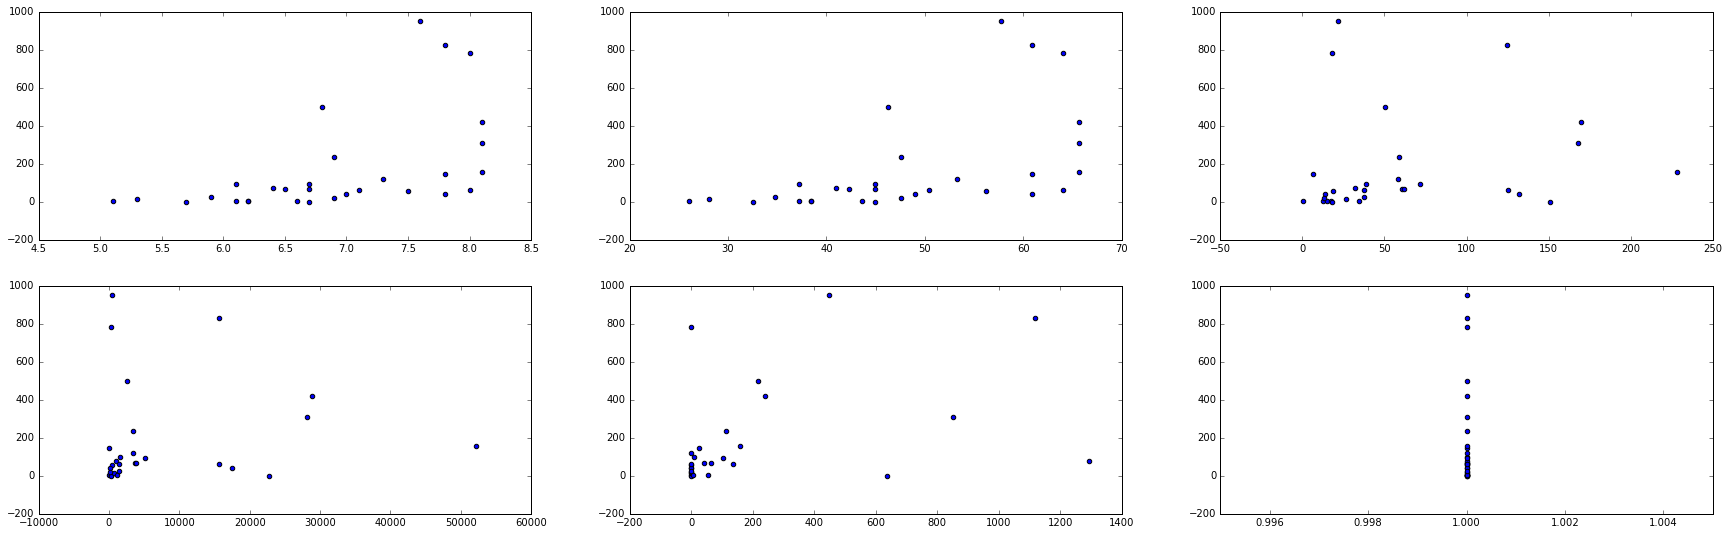

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

dep = label[:24]
ind = features[:24]

plt.figure(figsize=(30,9))

count = 1
for i in features.columns: 
    plt.subplot(2,3,count)
    plt.scatter(features[i],label)
    count +=1

In [6]:
import statsmodels.api as sm

model = sm.OLS(dep,ind)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_After   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     3.538
Date:                Fri, 22 Apr 2016   Prob (F-statistic):             0.0211
Time:                        08:04:48   Log-Likelihood:                -157.77
No. Observations:                  24   AIC:                             327.5
Df Residuals:                      18   BIC:                             334.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
IMDB_Rating    -1141.4800    838.256     -1.362      0.190     -2902.591   619.631
IMDB_Squared      97.1838     63.028      1.542      0.140       -35.233   229.600
Gross_Earnings     1.6041      3.462      0.463      0.649        -5.669     8.877
Gross_Squared     -0.0192      0.021     -0.908      0.376        -0.064     0.025
Total_Before       0.3280      0.123      2.672      0.016         0.070     0.586
Intercept       3296.6883   2738.510      1.204      0.244     -2456.708  9050.085
==============================================================================
Omnibus:                        9.563   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                8.539
Skew:                           0.924   Prob(JB):                       0.0140
Kurtosis:                       5.264   Cond. No.                     7.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
from sklearn.linear_model import Lasso
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression

#make the data
N = len(dep)-1   #the number of observations

X = np.array(ind)
y = np.array(dep)

#tune the lambda parameter by applying k-fold cross validation
kf = KFold(N, n_folds=3)    #produce the k folds

#make the data
N = len(y)-1   #the number of observations

#tune the lambda parameter by applying k-fold cross validation
kf = KFold(N, n_folds=3)    #produce the k folds

Lambda = np.arange(.1,10.0,0.1)    #a list of lambdas
Prediction_error = []    #an empty list to hold the prediction error

for l in Lambda:    #loop over lambdas
    pe = 0.0    #initialize prediction error
    for train_index, test_index in kf:    #loop over the folds
        X_train, X_test = X[train_index], X[test_index]    #create training and test independent variable data
        y_train, y_test = y[train_index], y[test_index]    #create training and test dependent variable data

        model = Lasso(l)    #create the model object
        results = model.fit(X_train,y_train)    #fit the model
        pe += sum((model.predict(X_test) - y_test)**2)    #predict the test data, compute the error, and add to total
    #print Lambda, pe
    Prediction_error.append(pe)    #append the prediction error

#run the lasso:
#Lambda = sum(((1.0/np.array(Prediction_error))/sum(1.0/np.array(Prediction_error)))*np.array(Lambda))    #compute lambda as the weighted average
model = Lasso(Lambda[Prediction_error.index(min(Prediction_error))])    #generate a model object
results = model.fit(X,y)    #fit the model
results.coef_

array([ 0.33040296,  0.        ])

In [7]:
#creates list for every possible feature combination

import itertools as it

ans = []
for i in range(5):
    ans.append(it.combinations(features.columns,i+1))

feature_combinations = []
for k in ans:
    for i in list(k):
        f = []
        for j in i: 
             f.append(j)        
        feature_combinations.append(f[:])
    
print feature_combinations
#X[feature_combinations[1]].head() 

[['IMDB_Rating'], ['IMDB_Squared'], ['Gross_Earnings'], ['Gross_Squared'], ['Total_Before'], ['Intercept'], ['IMDB_Rating', 'IMDB_Squared'], ['IMDB_Rating', 'Gross_Earnings'], ['IMDB_Rating', 'Gross_Squared'], ['IMDB_Rating', 'Total_Before'], ['IMDB_Rating', 'Intercept'], ['IMDB_Squared', 'Gross_Earnings'], ['IMDB_Squared', 'Gross_Squared'], ['IMDB_Squared', 'Total_Before'], ['IMDB_Squared', 'Intercept'], ['Gross_Earnings', 'Gross_Squared'], ['Gross_Earnings', 'Total_Before'], ['Gross_Earnings', 'Intercept'], ['Gross_Squared', 'Total_Before'], ['Gross_Squared', 'Intercept'], ['Total_Before', 'Intercept'], ['IMDB_Rating', 'IMDB_Squared', 'Gross_Earnings'], ['IMDB_Rating', 'IMDB_Squared', 'Gross_Squared'], ['IMDB_Rating', 'IMDB_Squared', 'Total_Before'], ['IMDB_Rating', 'IMDB_Squared', 'Intercept'], ['IMDB_Rating', 'Gross_Earnings', 'Gross_Squared'], ['IMDB_Rating', 'Gross_Earnings', 'Total_Before'], ['IMDB_Rating', 'Gross_Earnings', 'Intercept'], ['IMDB_Rating', 'Gross_Squared', 'Total_

In [9]:
from sklearn.linear_model import Lasso
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#make the data
N = len(dep)-1   #the number of observations

X = np.array(ind)
y = np.array(dep)



Prediction_error = []    #an empty list to hold the prediction error

kf = KFold(N, n_folds=3)    #produce the k folds
  #initialize prediction error
for s in feature_combinations:
    if 'Intercept' not in s:    
        s.append('Intercept')
    total_pe = 0.0 
    X = np.array(ind[s])
    y = np.array(dep)
    avg_r2 = []
    for train_index, test_index in kf:    #loop over the folds
        X_train, X_test = X[train_index], X[test_index]    #create training and test independent variable data
        y_train, y_test = y[train_index], y[test_index]    #create training and test dependent variable data

        model = LinearRegression()    #create the model object
        results = model.fit(X_train,y_train)    #fit the model
        pe = sum((model.predict(X_test) - y_test)**2)    #predict the test data, compute the error, and add to total
        total_pe += pe
        
        r2 = results.score(X_test,y_test)
        avg_r2.append(r2)
        print s, r2
        m = sm.OLS(y_train, X_train)
        r = m.fit()
        r.summary()
    Prediction_error.append((s,total_pe,sum(avg_r2)/2))    #append the prediction error

#for i in sorted(Prediction_error, key=lambda tup: tup[2],reverse = True):
#    print i


#fit the model
#r2_adj = 1 - ((sum((y_test-results.predict(X_test))**2.0)/(len(X_test) - len(results.params) - 1))
#               /(sum((y_test - np.mean(y_test))**2.0)/(len(X_test) - 1)))    #compute the adjusted r2 in the test set

['IMDB_Rating', 'Intercept'] -1.1376168625
['IMDB_Rating', 'Intercept'] 0.0357659385637
['IMDB_Rating', 'Intercept'] -1.09836667595
['IMDB_Squared', 'Intercept'] -1.11883066261
['IMDB_Squared', 'Intercept'] 0.0468738153112
['IMDB_Squared', 'Intercept'] -0.766645256686
['Gross_Earnings', 'Intercept'] -0.24905324307
['Gross_Earnings', 'Intercept'] -0.240981253391
['Gross_Earnings', 'Intercept'] 0.179846094379
['Gross_Squared', 'Intercept'] -0.261567774075
['Gross_Squared', 'Intercept'] -0.253989573238
['Gross_Squared', 'Intercept'] 0.165195835954
['Total_Before', 'Intercept'] 0.415672157212
['Total_Before', 'Intercept'] 0.0770957050876
['Total_Before', 'Intercept'] 0.322414970965
['Intercept'] -1.28880218641
['Intercept'] -0.221827216664
['Intercept'] -0.236129744677
['IMDB_Rating', 'IMDB_Squared', 'Intercept'] -1.16787172348
['IMDB_Rating', 'IMDB_Squared', 'Intercept'] 0.064817894555
['IMDB_Rating', 'IMDB_Squared', 'Intercept'] -0.176757527045
['IMDB_Rating', 'Gross_Earnings', 'Intercep

/home/dkanarek/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/home/dkanarek/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


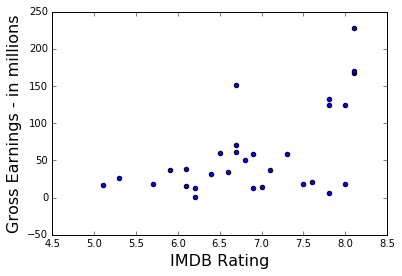

In [20]:
results = model.fit(ind,dep)
errors = label - results.predict(features)
plt.scatter(features['IMDB_Rating'],features['Gross_Earnings'])

plt.title('  ', fontsize = 20)
plt.xlabel('IMDB Rating', fontsize=16)
plt.ylabel('Gross Earnings - in millions', fontsize=16)

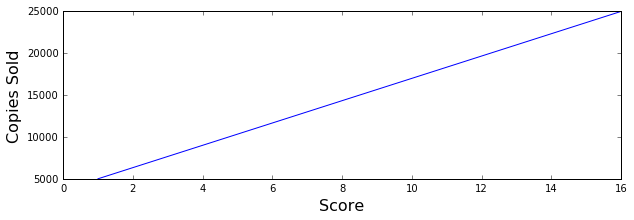

In [33]:
x = np.arange(min(features['Total_Before']),max(features['Total_Before']))
y = x*.3304

z = np.arange(1,18,3)
w = np.arange(5000,29000,4000)

plt.figure(figsize=(10,3))
plt.plot(z,w)
#plt.scatter(features['Total_Before'],label)
plt.title('  ', fontsize = 20)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Copies Sold', fontsize=16)

In [63]:
x_report

,Total_Before,Intercept
24,219,1
25,0,1
26,0,1
27,159,1
28,6,1
29,0,1


In [64]:
y_report

24    496
25     18
26    781
27    157
28      3
29     24
Name: Total_After, dtype: int64

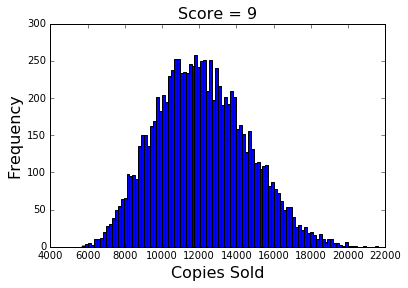

In [25]:
import random

def make_sales_range():
    upper = 25000
    lower = 5000
    r = np.zeros(15)
    s = sorted(np.random.uniform(lower,upper,15-2))    
    for i in range(1,14,1):
        r[i]=s[i-1]
    r[0]=lower
    r[len(r)-1]=upper
    return r


def multiple_ranges(n):
    rank_dict = {}
    for i in range(n):
        r = make_sales_range()
        for j in range(len(r)):
            if (j+1) in rank_dict:
                rank_dict[j+1].append(r[j])
            else:
                rank_dict[j+1] = [r[j]]
    return rank_dict

r = multiple_ranges(10000)

import matplotlib.mlab as mlab


rank  = 6

mean = np.mean(r[rank])
sigma = np.std(r[rank])
x = np.linspace(min(r[rank]),max(r[rank]))
plt.hist(r[rank],100)
plt.plot(x,mlab.normpdf(x,mean,sigma))
plt.title('Score = 9', fontsize = 16)
plt.xlabel('Copies Sold', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()
    

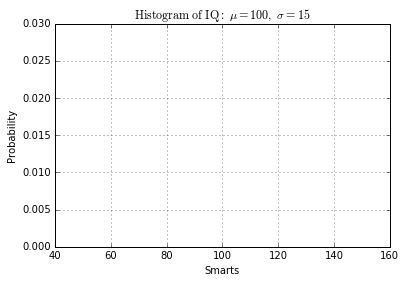

In [24]:
x = mean + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(r[rank], 100, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mean, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

41


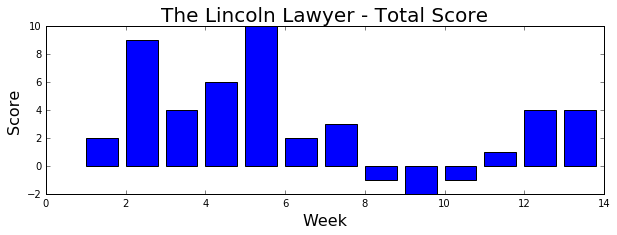

In [70]:
z =  bd[unicode('the silver linings playbook ')]
week = range(1,len(z)+1)
score = []
for i in range(len(week)):
    score.append(16 - z[i][1])

print sum(score)

    
plt.figure(figsize=(10,3))
plt.bar(week,score)
plt.title('The Lincoln Lawyer - Total Score', fontsize = 20)
plt.xlabel('Week', fontsize=16)
plt.ylabel('Score', fontsize=16)

In [103]:
z

[('2013-02-15', 14),
 ('2013-02-22', 7),
 ('2013-03-01', 12),
 ('2013-03-08', 10),
 ('2013-03-15', 6),
 ('2013-03-22', 14),
 ('2013-03-29', 13),
 ('2013-04-05', 17),
 ('2013-04-26', 18),
 ('2013-05-03', 17),
 ('2013-05-17', 15),
 ('2013-05-24', 12),
 ('2013-05-31', 12)]